In [1]:
# Handling paths for importing code
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

from Code.utilities import MSELoss_method, cross_entropy_loss_method, predict, accuracy_func_method
from Code.descent_methods import SGD_adam, SGD
from Code.data_handling import load_MNIST_8, load_MNIST_28, append_run_to_file, load_run_from_file
from Code.softmax_regression import softmax_beta_init, softmax_model, softmax
from Code.neural_network import _beta_init, get_neural_network_model
from Code.plot import plot_faulty_predictions, plot_confusion_matrix, plot_grid_search_result, plot_some_imgs, plot_test_results

from jax import jit, nn, grad
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default font size for text elements (e.g., titles, labels)
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["axes.titlesize"] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

# Set filename start. Create the folder if gone
filepath_location = "Figures/b/"
if not os.path.exists(filepath_location):
    os.makedirs(filepath_location[0:-1])

c:\Users\Eirik\Desktop\UIO\FYSSTK\Project3_FYS_STK4155\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\Eirik\Desktop\UIO\FYSSTK\Project3_FYS_STK4155\Code\plot.py:189: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


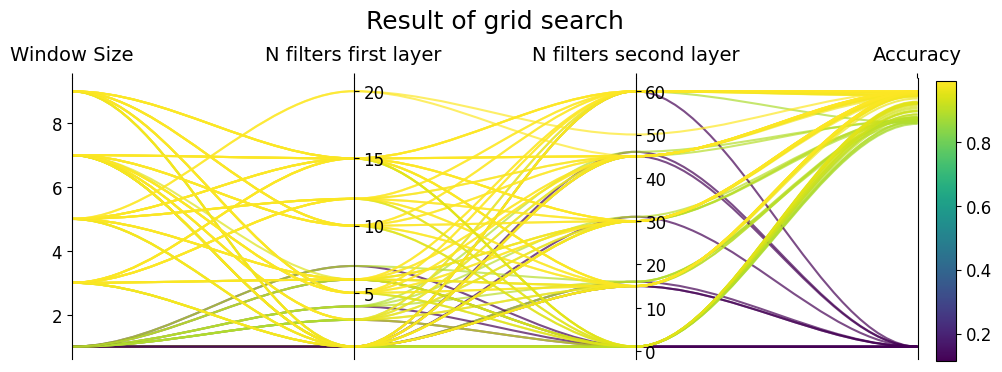

In [10]:
import ast

def plot_NN_grid_from_file(filepath):

    run_list = load_run_from_file(filepath)

    data = {
        "Window Size": [],
        "N filters first layer": [],
        "N filters second layer": [],
        "Accuracy": [],
    }

    for run in run_list:
            
            window_list = ast.literal_eval(run["window_size_list"])


            data["Window Size"].append(window_list[0][0])
            data["N filters first layer"].append(window_list[0][1])
            data["N filters second layer"].append(window_list[1][1])
            data["Accuracy"].append(run["test_accuracy"])

    plot_grid_search_result(data)


plot_NN_grid_from_file("convolutional_final_testing.json")